<a href="https://colab.research.google.com/github/Anish-185/Champions_League_Match_Analysis25-26/blob/main/Champions_League_Matches25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
df=pd.read_csv('/champions_league_matches.csv')

In [82]:
df.head()


,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,436 of 529,295 of 380,...,0 of 0,1 of 1,82.4,77.6,11.1,0.0,NaN,100.0,Home Win,Tottenham
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       144 non-null    object 
 1   home_team                  144 non-null    object 
 2   away_team                  144 non-null    object 
 3   score                      108 non-null    object 
 4   venue                      144 non-null    object 
 5   referee                    108 non-null    object 
 6   home_possession            108 non-null    object 
 7   away_possession            108 non-null    object 
 8   home_passing_accuracy      108 non-null    object 
 9   away_passing_accuracy      108 non-null    object 
 10  home_shots_on_target       108 non-null    object 
 11  away_shots_on_target       108 non-null    object 
 12  home_saves                 108 non-null    object 
 13  away_saves                 108 non-null    object 

In [84]:
df["date"]=pd.to_datetime(df["date"],dayfirst=True,errors="coerce")

/tmp/ipython-input-3283202490.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["date"]=pd.to_datetime(df["date"],dayfirst=True,errors="coerce")


In [85]:
df["score"]=df["score"].astype("category")

In [86]:
df

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,436 of 529,295 of 380,...,0 of 0,1 of 1,82.4,77.6,11.1,0.0,NaN,100.0,Home Win,Tottenham
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2026-01-28,Barcelona,FC Copenhagen,NaN,Spotify Camp Nou,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2026-01-28,Leverkusen,Villarreal,NaN,BayArena,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2026-01-28,Paris S-G,Newcastle Utd,NaN,Parc des Princes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2026-01-28,Napoli,Chelsea,NaN,Stadio Diego Armando Maradona,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       144 non-null    datetime64[ns]
 1   home_team                  144 non-null    object        
 2   away_team                  144 non-null    object        
 3   score                      108 non-null    category      
 4   venue                      144 non-null    object        
 5   referee                    108 non-null    object        
 6   home_possession            108 non-null    object        
 7   away_possession            108 non-null    object        
 8   home_passing_accuracy      108 non-null    object        
 9   away_passing_accuracy      108 non-null    object        
 10  home_shots_on_target       108 non-null    object        
 11  away_shots_on_target       108 non-null    object        
 12  home_sav

In [88]:
df.head()

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
0,2025-09-16,PSV Eindhoven,Union SG,1–3,Philips Stadion,Anthony Taylor,62%,38%,470 of 588,251 of 358,...,4 of 6,2 of 3,79.9,70.1,30.0,35.3,66.7,66.7,Away Win,Union SG
1,2025-09-16,Athletic Club,Arsenal,0–2,San Mamés,Donatas Rumšas,39%,61%,246 of 338,435 of 532,...,4 of 6,2 of 2,72.8,81.8,18.2,54.5,66.7,100.0,Away Win,Arsenal
2,2025-09-16,Tottenham,Villarreal,1–0,Tottenham Hotspur Stadium,Rade Obrenović,58%,42%,436 of 529,295 of 380,...,0 of 0,1 of 1,82.4,77.6,11.1,0.0,NaN,100.0,Home Win,Tottenham
3,2025-09-16,Benfica,Qarabağ,2–3,Estádio do Sport Lisboa e Benfica,Erik Lambrechts,53%,47%,431 of 517,372 of 462,...,2 of 5,1 of 3,83.4,80.5,21.4,50.0,40.0,33.3,Away Win,Qarabağ
4,2025-09-16,Juventus,Dortmund,4–4,Allianz Stadium,François Letexier,52%,48%,459 of 532,410 of 501,...,1 of 4,3 of 7,86.3,81.8,36.8,44.4,25.0,42.9,Draw,Draw


In [89]:
df.tail()

,date,home_team,away_team,score,venue,referee,home_possession,away_possession,home_passing_accuracy,away_passing_accuracy,...,home_saves,away_saves,home_passing_accuracy_pct,away_passing_accuracy_pct,home_shots_on_target_pct,away_shots_on_target_pct,home_saves_pct,away_saves_pct,result,winner
146,2026-01-28,Barcelona,FC Copenhagen,NaN,Spotify Camp Nou,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2026-01-28,Leverkusen,Villarreal,NaN,BayArena,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2026-01-28,Paris S-G,Newcastle Utd,NaN,Parc des Princes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2026-01-28,Napoli,Chelsea,NaN,Stadio Diego Armando Maradona,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2026-01-28,Pafos FC,Slavia Prague,NaN,Alphamega Stadium,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
display(df.isnull().sum())

,0
date,7
home_team,7
away_team,7
score,43
venue,7
referee,43
home_possession,43
away_possession,43
home_passing_accuracy,43
away_passing_accuracy,43


In [91]:
df["date"].fillna("feed",inplace=True)

/tmp/ipython-input-2796740270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["date"].fillna("feed",inplace=True)
/tmp/ipython-input-2796740270.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'feed' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df["date"].fillna("feed",inplace=True)


In [92]:
for col in ["score","result","winner","referee","venue","home_team","away_team"] :
  mode_val=df[col].mode()[0]
  df[col].fillna(mode_val,inplace=True)

/tmp/ipython-input-221115560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val,inplace=True)


In [93]:
num_cols = ["home_passing_accuracy_pct","away_passing_accuracy_pct","home_shots_on_target_pct","away_shots_on_target_pct","home_saves_pct","away_saves_pct"]
for col in num_cols :
  df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipython-input-1459512450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [94]:
df.isna().sum()

,0
date,0
home_team,0
away_team,0
score,0
venue,0
referee,0
home_possession,43
away_possession,43
home_passing_accuracy,43
away_passing_accuracy,43


In [95]:
df.columns

Index(['date', 'home_team', 'away_team', 'score', 'venue', 'referee',
       'home_possession', 'away_possession', 'home_passing_accuracy',
       'away_passing_accuracy', 'home_shots_on_target', 'away_shots_on_target',
       'home_saves', 'away_saves', 'home_passing_accuracy_pct',
       'away_passing_accuracy_pct', 'home_shots_on_target_pct',
       'away_shots_on_target_pct', 'home_saves_pct', 'away_saves_pct',
       'result', 'winner'],
      dtype='object')

In [96]:
team_home=df.groupby("home_team")[["home_passing_accuracy_pct","home_shots_on_target_pct"]].mean()

In [97]:
team_home

,home_passing_accuracy_pct,home_shots_on_target_pct
home_team,,
Ajax,82.980135,34.593603
Arsenal,81.833796,41.025926
Atalanta,80.533796,23.025926
Athletic Club,76.683796,22.150926
Atlético Madrid,85.158796,45.775926
Barcelona,86.508796,31.700926
Bayern Munich,88.233796,35.900926
Benfica,82.033796,29.800926
Bodø/Glimt,84.458796,27.975926


In [98]:
team_home_sorted=team_home.sort_values("home_passing_accuracy_pct",ascending=False)

In [99]:
team_home_sorted

,home_passing_accuracy_pct,home_shots_on_target_pct
home_team,,
Bayern Munich,88.233796,35.900926
Paris S-G,87.433796,41.075926
Barcelona,86.508796,31.700926
Manchester City,86.333796,42.050926
Napoli,86.333796,28.850926
Chelsea,86.133796,36.575926
Atlético Madrid,85.158796,45.775926
Juventus,84.933796,35.575926
Dortmund,84.633796,45.850926


In [100]:
display(team_home_sorted.index)

Index(['Bayern Munich', 'Paris S-G', 'Barcelona', 'Manchester City', 'Napoli',
       'Chelsea', 'Atlético Madrid', 'Juventus', 'Dortmund', 'Real Madrid',
       'Bodø/Glimt', 'Inter', 'Leverkusen', 'Sporting CP', 'Liverpool', 'Ajax',
       'Marseille', 'Tottenham', 'PSV Eindhoven', 'Benfica', 'Arsenal',
       'Club Brugge', 'Villarreal', 'Atalanta', 'Union SG', 'Monaco',
       'Eint Frankfurt', 'Newcastle Utd', 'FC Copenhagen', 'Galatasaray',
       'Qarabağ', 'Olympiacos', 'Pafos FC', 'Athletic Club', 'Qaırat Almaty',
       'Slavia Prague'],
      dtype='object', name='home_team')

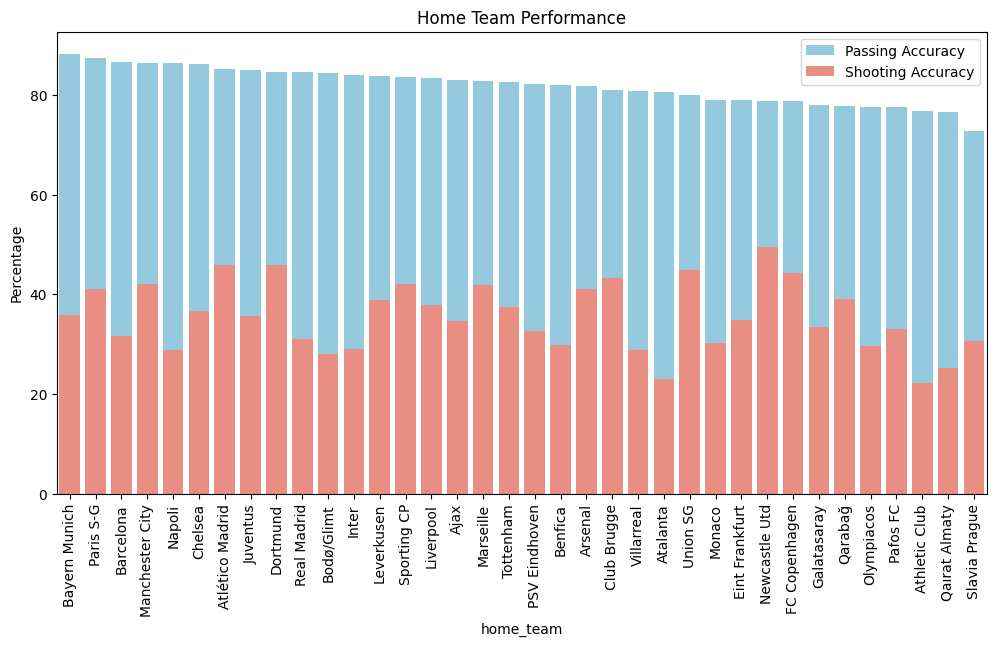

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_home_sorted.index,y=team_home_sorted["home_passing_accuracy_pct"],color="skyblue",label="Passing Accuracy")
sns.barplot(x=team_home_sorted.index,y=team_home_sorted["home_shots_on_target_pct"],color="salmon",label="Shooting Accuracy")
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.title("Home Team Performance")
plt.legend()
plt.show()

In [102]:
team_away=df.groupby("away_team")[["away_passing_accuracy_pct","away_shots_on_target_pct"]].mean()

In [103]:
team_away

,away_passing_accuracy_pct,away_shots_on_target_pct
away_team,,
Ajax,81.643771,31.443771
Arsenal,81.152546,48.652546
Atalanta,81.727546,30.527546
Athletic Club,75.502546,40.327546
Atlético Madrid,81.177546,36.352546
Barcelona,84.877546,32.177546
Bayern Munich,82.502546,43.652546
Benfica,80.752546,33.652546
Bodø/Glimt,79.552546,46.052546


In [104]:
team_away_sorted=team_away.sort_values("away_passing_accuracy_pct",ascending=False)

In [105]:
team_away_sorted

,away_passing_accuracy_pct,away_shots_on_target_pct
away_team,,
Manchester City,87.527546,50.802546
Paris S-G,86.627546,33.902546
Sporting CP,86.152546,26.052546
Liverpool,85.402546,42.327546
Leverkusen,85.227546,33.627546
Club Brugge,85.127546,29.352546
Real Madrid,84.927546,41.477546
Barcelona,84.877546,32.177546
Chelsea,84.477546,36.152546


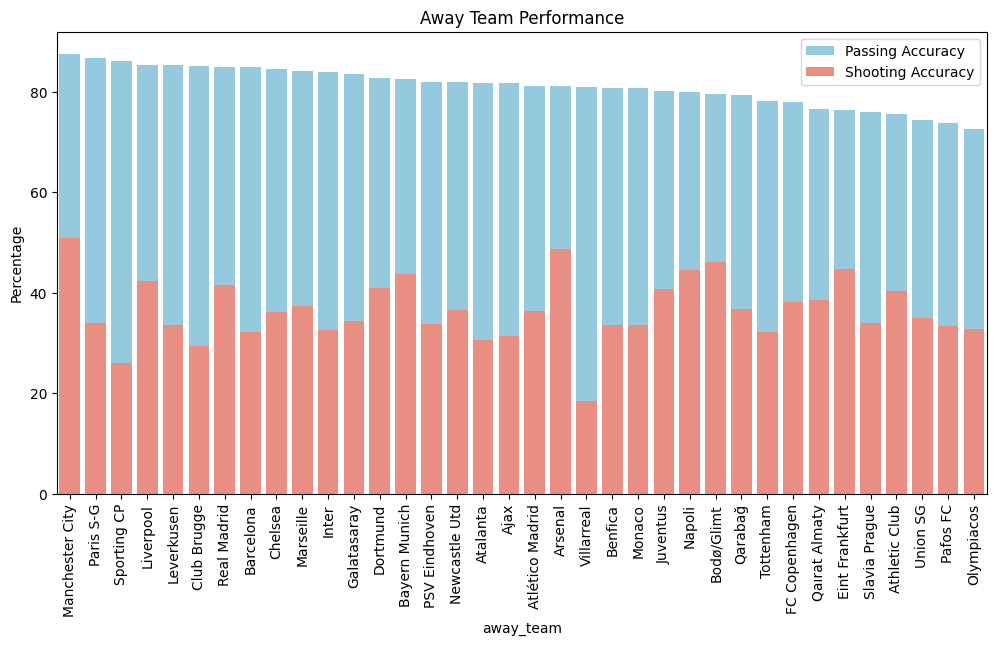

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_away_sorted.index,y=team_away_sorted["away_passing_accuracy_pct"],color="skyblue",label="Passing Accuracy")
sns.barplot(x=team_away_sorted.index,y=team_away_sorted["away_shots_on_target_pct"],color="salmon",label="Shooting Accuracy")
plt.xticks(rotation=90)
plt.title("Away Team Performance")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [118]:
team_away=df.groupby("away_team")[["away_passing_accuracy_pct","away_shots_on_target_pct"]].mean()
team_away

,away_passing_accuracy_pct,away_shots_on_target_pct
away_team,,
Ajax,81.643771,31.443771
Arsenal,81.152546,48.652546
Atalanta,81.727546,30.527546
Athletic Club,75.502546,40.327546
Atlético Madrid,81.177546,36.352546
Barcelona,84.877546,32.177546
Bayern Munich,82.502546,43.652546
Benfica,80.752546,33.652546
Bodø/Glimt,79.552546,46.052546


In [119]:
home_stats=df.groupby("home_team")[["home_passing_accuracy_pct","home_shots_on_target_pct"]].mean()
away_stats=df.groupby("away_team")[["away_passing_accuracy_pct","away_shots_on_target_pct"]].mean()

team_comparision=home_stats.join(away_stats,how="outer")
team_comparision

,home_passing_accuracy_pct,home_shots_on_target_pct,away_passing_accuracy_pct,away_shots_on_target_pct
home_team,,,,
Ajax,82.980135,34.593603,81.643771,31.443771
Arsenal,81.833796,41.025926,81.152546,48.652546
Atalanta,80.533796,23.025926,81.727546,30.527546
Athletic Club,76.683796,22.150926,75.502546,40.327546
Atlético Madrid,85.158796,45.775926,81.177546,36.352546
Barcelona,86.508796,31.700926,84.877546,32.177546
Bayern Munich,88.233796,35.900926,82.502546,43.652546
Benfica,82.033796,29.800926,80.752546,33.652546
Bodø/Glimt,84.458796,27.975926,79.552546,46.052546


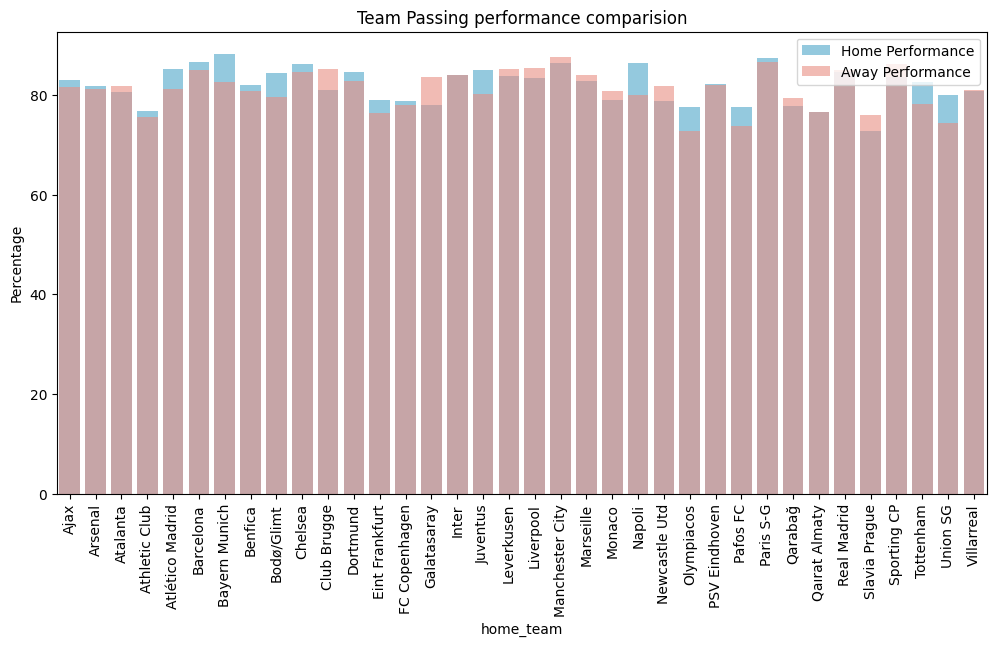

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_comparision.index,y=team_comparision["home_passing_accuracy_pct"],color="skyblue",label="Home Performance")
sns.barplot(x=team_comparision.index,y=team_comparision["away_passing_accuracy_pct"],color="salmon",alpha=0.6,label="Away Performance")
plt.title("Team Passing performance comparision")
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.legend()

plt.show()

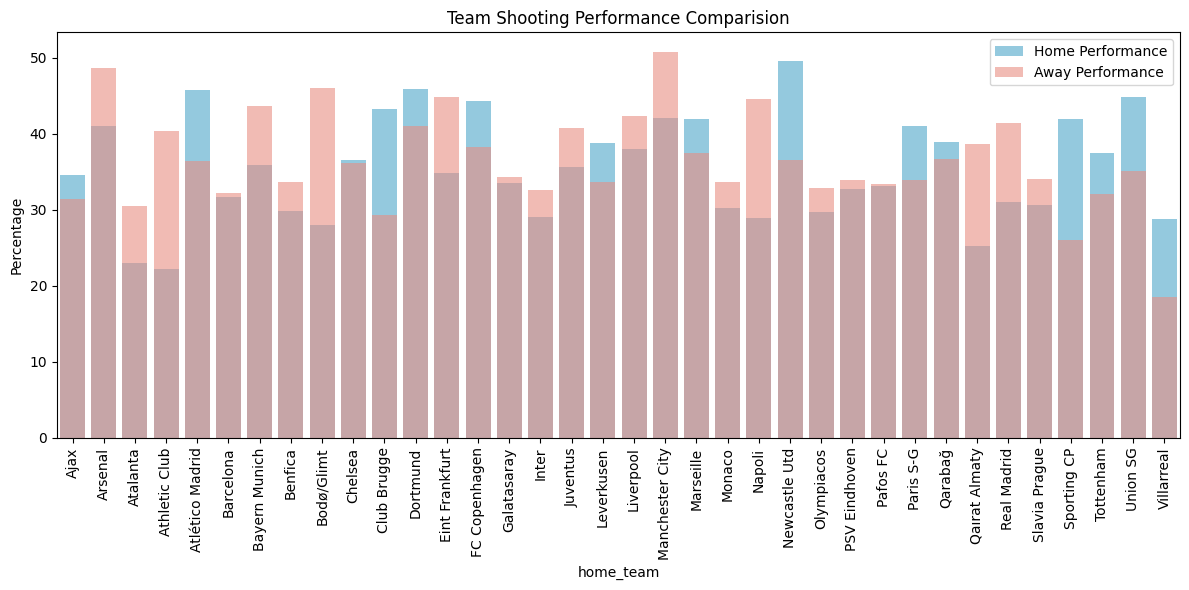

In [127]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_comparision.index,y=team_comparision["home_shots_on_target_pct"],color="skyblue",label="Home Performance")
sns.barplot(x=team_comparision.index,y=team_comparision["away_shots_on_target_pct"],color="salmon",alpha=0.6,label="Away Performance")
plt.xticks(rotation=90)
plt.title("Team Shooting Performance Comparision")
plt.ylabel("Percentage")
plt.tight_layout()
plt.legend()
plt.show()